In [9]:
# https://mne.tools/stable/auto_tutorials/raw/40_visualize_raw.html#sphx-glr-auto-tutorials-raw-40-visualize-raw-py
import mne
sample_data_raw_file="./egi_raw.fif"
raw = mne.io.read_raw_fif(sample_data_raw_file)
raw.load_data()

Opening raw data file ./egi_raw.fif...
    Range : 0 ... 199 =      0.000 ...     0.995 secs
Ready.
Reading 0 ... 199  =      0.000 ...     0.995 secs...


<Raw | egi_raw.fif, 256 x 200 (1.0 s), ~751 kB, data loaded>

In [10]:
raw.plot()

Using qt as 2D backend.


Effective window size : 1.000 (s)


C:\Users\zhouz\AppData\Local\Temp\ipykernel_32900\3446258115.py:1: UserWarning: Zero value in spectrum for channel E1
  spectrum = raw.compute_psd()
C:\Users\zhouz\AppData\Local\Temp\ipykernel_32900\3446258115.py:2: UserWarning: Infinite value in PSD for channel E1.
These channels might be dead.
  spectrum.plot(average=True, picks="data", exclude="bads")
c:\Users\zhouz\mne-python\1.3.1_0\envs\mne\lib\site-packages\mne\viz\utils.py:151: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


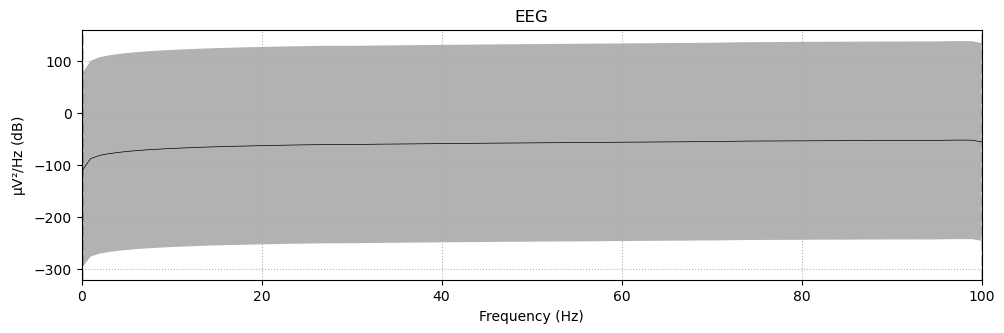

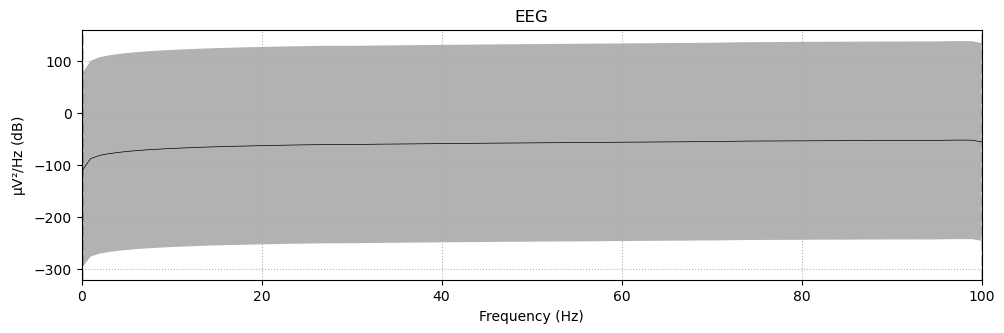

In [11]:
spectrum = raw.compute_psd()
spectrum.plot(average=True, picks="data", exclude="bads")

In [36]:
 np.arange(0, 200, sampling_freq)

array([0])

In [37]:
import numpy as np
events = np.column_stack(
    (
        np.arange(0, 1000, 200),
        np.zeros(5, dtype=int),
        np.array([1, 2, 1, 2, 1]),
    )
)

In [57]:
events

array([[  0,   0,   1],
       [200,   0,   2],
       [400,   0,   1],
       [600,   0,   2],
       [800,   0,   1]])

In [38]:
event_dict = dict(condition_A=1, condition_B=2)

In [58]:
import mne
epochs = mne.Epochs(raw, events, tmin=-0.01, tmax=0.9, event_id=event_dict, preload=True)
evoked = epochs["condition_A"].average()

Not setting metadata
5 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 5 events and 183 original time points ...
5 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


c:\Users\zhouz\mne-python\1.3.1_0\envs\mne\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\zhouz\mne-python\1.3.1_0\envs\mne\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
C:\Users\zhouz\AppData\Local\Temp\ipykernel_32900\3541518180.py:3: RuntimeWarning: evoked object is empty (based on less than 1 epoch)
  evoked = epochs["condition_A"].average()


In [59]:
mne.write_evokeds('evoked_A-ave.fif', evoked, on_mismatch='raise', overwrite=True, verbose=None)

Overwriting existing file.


In [60]:
# save cov
# # https://mne.tools/stable/auto_tutorials/raw/40_visualize_raw.html#sphx-glr-auto-tutorials-raw-40-visualize-raw-py
raw_empty_room=raw
raw_empty_room.info["bads"]


[]

In [43]:
raw_empty_room.add_proj([pp.copy() for pp in raw.info["projs"] if "EEG" not in pp["desc"]])

0 projection items deactivated


<Raw | egi_raw.fif, 256 x 200 (1.0 s), ~751 kB, data loaded>

In [64]:
noise_cov = mne.compute_raw_covariance(raw_empty_room, tmin=-0.1, tmax=0.4)

Using up to 2 segments
Number of samples used : 40
[done]


C:\Users\zhouz\AppData\Local\Temp\ipykernel_32900\1690330111.py:1: RuntimeWarning: Too few samples (required : 1285 got : 40), covariance estimate may be unreliable
  noise_cov = mne.compute_raw_covariance(raw_empty_room, tmin=-0.1, tmax=0.4)


    The projection vectors do not apply to these channels.
Computing rank from covariance with rank=None
    Using tolerance 8.5e-14 (2.2e-16 eps * 256 dim * 1.5  max singular value)
    Estimated rank (eeg): 99
    EEG: rank 99 computed from 256 data channels with 0 projectors


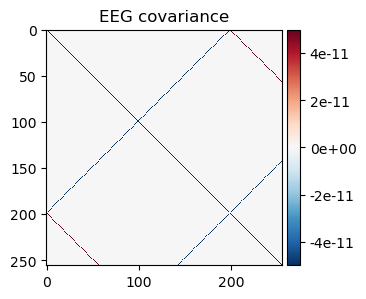

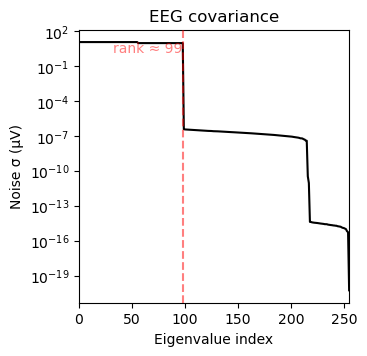

(<Figure size 380x370 with 2 Axes>, <Figure size 380x370 with 1 Axes>)

In [48]:
noise_cov.plot(raw_empty_room.info, proj=True)

In [ ]:
mne.write_cov('egi-cov.fif', noise_cov, overwrite=True, verbose=None)

In [47]:
noise_cov_baseline = mne.compute_covariance(epochs, tmin=-0.4,tmax=0)

ValueError: need at least one array to concatenate